# Image Operators And Transforms

<center><img src="figs/00_dip.jpeg" width=500px alt="default"/></center>


Now that we haveseen how images are formed through the interaction of 3D scene elements, lighting, and camera optics and sensors, let us look at the first stage in most computer vision algorithms, namely the use of image processing to preprocess the image and convert it into a form suitable for further analysis.

Operators : transform an image into another image.

# Images

$\color{#EF5645}{\text{Continuous Images}}$: A continuous image is represented as a function over a 2D continuous domain $\Omega^2$, i.e. $f: \Omega^2 \rightarrow \mathbb{R}^c$, where $c$ is the number of channels of the images. The elements $x$ of the continuous domain are represented by their 2D coordinates.

$\color{#EF5645}{\text{Discrete Images}}$: A discrete (sampled) image is represented as a function over a 2D discrete domain $[1, ..., n] \times [1, ..., m] $, i.e. $f: [1, ..., n] \times [1, ..., m] \rightarrow \mathbb{R}^c$, where $c$ is the number of channels of the images. The elements $x$ of the discrete domain are denoted by the indices of the pixel that they represent $x=(i, j)$.

(512, 512, 3)


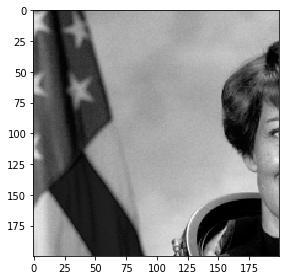

In [58]:
from skimage import data, io

image = data.astronaut()

print(image.shape)

io.imshow(image[:200, :200, 2]);

# Operators

$\color{#EF5645}{\text{Operator}}$: An operator is a function $h$ that takes one image $f$ as input and produces an output image $g$.

$\color{#EF5645}{\text{Linear Operator}}$: Let $h$ be an operator that takes pictures into pictures. $h$ islinearif $h(af+bg) =ah(f) +bh(g)$ forall picturesfandg, and for all constantsaandb.

Both correlation and convolution are linear shift-invariant (LSI) operators, which obey both the superposition principle (3.5), h ◦ (f0 + f1)= h ◦ f0 + h ◦ f1, (3.16) and the shift invariance principle, g(i,j )= f (i + k,j + l) ⇔ (h ◦ g)(i,j )=( h ◦ f )(i + k,j + l), (3.17) which means that shifting asignal commutes with applying the operator (◦ stands for the LSI operator). Another way tothink of shift invariance is that the operator “behaves the same everywhere”.


# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- [Fourier Transforms](#sec-ece)

# Point Operators

- Also called Point Processes
- Each output pixel’s value depends on only the corresponding input pixel value

$\color{#047C91}{\text{Example}}$: Brightness and contrast adjustments

<center><img src="figs/02_brightness.png" width=400px alt="default"/></center>


# Point Operators

$\color{#EF5645}{\text{Point Operator}}$: A general point processing operator is a function $h$ that takes one image $f$ as input and produces an output image $g$, such that:
- For continuous images and $x \in \Omega^2$ a 2D continuous domain:
$$g(x) = h(f(x))$$
- For discrete images and $x=(i, j) \in [1, n]^2$ a 2D discrete domain:
$$g(i, j) = h(f(i ,j))$$

# Example

$\color{#047C91}{\text{Example}}$: Multiplicative gain operator:
$$g(x) = af(x) + b,$$
where $a >0$ and $b$ are called the gain and bias parameters.

$\color{#047C91}{\text{Example}}$: Spatially varying multiplicative gain operator:
$$g(x) = a(x)f(x) + b(x),$$
where the bias and gain parameters can also be spatially varying.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


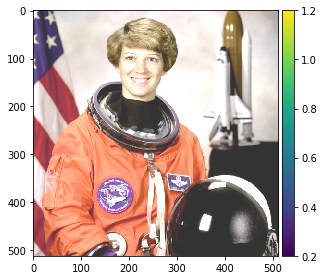

In [49]:
from skimage import data, io

image = data.astronaut()
image = image / 255

gain = 1.
bias = 0.2

mult_image = gain * image + bias
io.imshow(mult_image);

$\color{#047C91}{\text{Example}}$: Linear blend operator:
$$g(x) = (1- \alpha)f_0(x) + \alpha f_1(x)$$
Varying $\alpha$ from $0$ to $1$, this operator can be used to perform atemporal cross-dissolve between twoimages or videos, as seen in slide shows and film production

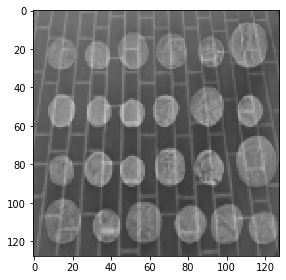

In [48]:
from skimage import data, io
from skimage.transform import resize

image0 = data.coins() / 255
image1 = data.brick() / 255
image0 = resize(image0, (128, 128))
image1 = resize(image1, (128, 128))

alpha = 0.5

blend_image = (1 - alpha) * image0 + alpha * image1
io.imshow(blend_image);

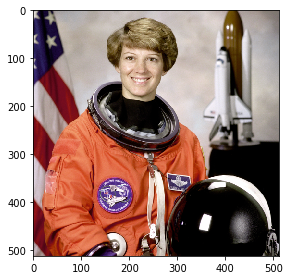

In [66]:
from skimage import data, io
import numpy as np

image = data.astronaut() / 255

new_image = np.concatenate([
    1. * image[:, :, 0, np.newaxis],
    1. * image[:, :, 1, np.newaxis],
    1. * image[:, :, 2, np.newaxis],
], axis=-1)

io.imshow(new_image);

# Linear Operators

$\color{#047C91}{\text{Exercise}}$: Among the operators defined above, which are linear operators?

# Histogram Equalization

While the brightness and gain controls described inSection 3.1.1 can improvethe appearance of an image, how can we automatically determine their best values?

Approaches:
- look at the darkest and brightest pixel values in an image and map them to pure black and pure white
- find the average value in the image, push it towards middle gray,and expand the range so that itmore closely fills the displayable values
- or btter: lighten some dark values and darken some light values? his equalization.

Visualize the set of lightness values in an image to test some of these heuristics?
- Plot the histogram of each value

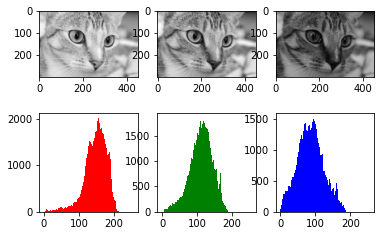

In [75]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(2,3)
bins = np.arange(-0.5, 255+1,1)
for ci, c in enumerate('rgb'):
    ax[0,ci].imshow(image[:,:,ci], cmap='gray')
    ax[1,ci].hist(image[:,:,ci].flatten(), bins = bins, color=c)

# Histogram Equalization

$\color{#EF5645}{\text{Histogram equalization}}$: Find an intensity mapping function such that the resulting histogram is flat.

The trick to finding such amapping is the same one that people use to generate random samples from a probability density function,which isto first compute the cumulative distribution function


# Explanation

# In Python

# In Scikit-Image

# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- [Fourier Transforms](#sec-ece)

Neighborhood operator or local operator: uses acollection of pixelvalues in the vicinity of agiven pixelto determine its final output value (Figure 3.10). In addition to performing local tone adjustment, neighborhood operators can be used to filter images to add soft blur,sharpen details, accentuate edges, or removenoise (Figure 3.11b–d). In this section, we look at linear filtering operators, which involvefix ed weighted combinations of pixels in small neighborhoods.


$\color{#EF5645}{\text{Linear Filter}}$:  An output pixel’svalue isaweighted sum of pixelvalues within asmall neighborhood N.



# Correlation

$\color{#EF5645}{\text{Correlation operator}}$: The correlation operator, denoted $g = f \otimes h$ is defined as:
$$g(i, j) = (f \otimes h) (i, j) = \sum_{k, l} f(i+k, j+l)h(k, l).$$
- $h$ is called the kernel, filter, or mask.
- the entries in $h$ are called the filter coefficients.
The continuous version writes:
$$g(x) = (f \otimes h) (x) = \int_u f(x+u)h(u)du.$$

$\color{#EF5645}{\text{Remark}}$: Changing the filter $h$ will produce different filtering.

# Convolution

$\color{#EF5645}{\text{Convolution operator}}$: The convolution operator, denoted $g = f * h$ is defined as:
$$g(i, j) = (f * h) (i, j) = \sum_{k, l} f(k, l)h(i-k, j-l).$$
- $h$ is called the impulse response function.
The continuous version writes:
$$g(x) = (f * h) (x) = \int_u f(u)h(x-u)du.$$

$\color{#EF5645}{\text{Remark}}$: Changing the filter $h$ will produce different filtering.

<center><img src="figs/02_conv.png" width=800px alt="default"/></center>


$\color{#047C91}{\text{Example}}$: 
Show that both correlation and convolution are linear shift-invariant (LSI) operators.

# Matrix (Toepliz)

Correlation and convolution can both be written as amatrix-v ector multiplication, ifwe first convert the two-dimensional images f (i,j ) and g(i,j ) into raster-ordered vectors f and g, g = Hf , (3.19) where the (sparse) H matrix contains the convolution kernels.


# Examples of Linear Filtering

$\color{#EF5645}{\text{Moving Average}}$: The simplest filter toimplement isthe moving average or box filter,which simply averages the pixelvalues in a K × K window.This isequi valent to convolving the image with akernel of all ones and then scaling (Figure 3.14a).

$\color{#EF5645}{\text{Barlett Filter}}$: A smoother image can be obtained by separably convolving the image with apiece wise linear “tent” function (also known as a Bartlett filter). Figure 3.14b shows a3 × 3version of this filter,which is called the bilinear kernel, since itis the outer product of twolinear (first-order) splines (see Section 3.5.2).

$\color{#EF5645}{\text{Gaussian Filter}}$: Convolving the linear tent function with itself yields the cubic approximating spline, which iscalled the “Gaussian” kernel (Figure 3.14c) in Burt and Adelson’s(1983a ) Laplacian pyramid representation (Section 3.5).Note that approximate Gaussian kernels can also be obtained by iterated convolution with box filters (Wells 1986).




<center><img src="figs/02_linfilters1.png" width=600px alt="default"/></center>


The kernels we just discussed are all examples of blurring (smoothing) or low-pass kernels, since theypass through the lower frequencies while attenuating higher frequencies

Surprisingly,smoothing kernels can also be used to sharpen images using aprocess called unsharp masking.Since blurring the image reduces high frequencies, adding some of the difference between the original and the blurred image makes itsharper , gsharp = f + γ(f − hblur ∗ f ).


inear filtering can also be used as apre-processing stage to edge extraction (Section 7.2) and interest point detection (Section 7.1)algorit hms.

$\color{#EF5645}{\text{Sobel Operator}}$:
Figure 3.14d shows asimple 3 × 3edge extractor called the Sobel operator,which isaseparable combination of ahorizontal central difference (so called because the horizontal derivativeiscentered on the pixel) and avertical

tent filter (to smooth the results). As you can see in the image below the kernel, this filter effectively emphasizes vertical edges. 

$\color{#EF5645}{\text{Corner Detector}}$:
The simple corner detector (Figure 3.14e) looks for simultaneous horizontal and vertical second derivatives. As you can see, however,itresponds not only tothe corners of the square, but also along diagonal edges. 


<center><img src="figs/02_linfilters2.png" width=300px alt="default"/></center>

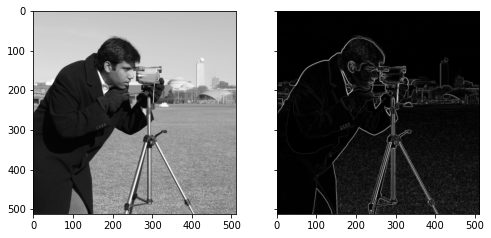

In [80]:
image = skimage.data.camera()
edge_sobel = skimage.filters.sobel(image)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
axes[0].imshow(image , cmap=plt.cm.gray)
axes[1].imshow(edge_sobel, cmap=plt.cm.gray);

The Sobel and corner operators are simple examples of band-pass filters, since theyfilter out both low and high frequencies.

# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- [Fourier Transforms](#sec-ece)

- [Pyramids and Wavelets](#sec-ece)

We mentioned that Fourier analysis could be used to analyze the frequency characteristics of various filters. In this section, we explain both how Fourier analysis lets us determine these characteristics (i.e., the frequency content of an image) and how using the Fast Fourier Transform (FFT) lets us perform large-kernel convolutions in time that is independent of the kernel’ssize.


# 1D Fourier Transform

Howcan we analyze what agiven filter does to high, medium, and lowfrequencies? The answer isto simply pass asinusoid of known frequencythrough the filter and to observeby howmuch itisattenuated. Let s(x)=sin(2 πfx + φi)=sin( ωx + φi) (3.50) be the input sinusoid whose frequency is f , angular frequency is ω =2 πf ,and phase is φi. Note that in thissection, we use the variables x and y to denote the spatial coordinates of an image, rather than i and j as in the previous sections.
b

# 1D Fourier Transform


fwe convolvethe sinusoidal signal s(x) with afilter whose impulse response is h(x), we get another sinusoid of the same frequencybut different magnitude A and phase φo, o(x)= h(x) ∗ s(x)= A sin(ωx + φo) = Aej(ωx+φ)


he newmagnitude A iscalled the gain or magnitude of the filter,whil ethe phase difference ∆φ = φo − φi iscalled the shift or phase.


# 1D Fourier Transform


$\color{#EF5645}{\text{Fourier Transform}}$: he Fourier transform issimply atab ulation of the magnitude and phase response ateach frequency, H(ω)= F{ h(x)} = Aejφ,

- Continuous domain
(ω)= ∫∞ −∞ h(x)e−jωx dx,
- Discrete domain 
H(k)= 1 N N −1 ∑ x=0 h(x)e−j 2πkx N ,

where N isthe length of the signal or region of analysis. These formulas apply both to filters, such as h(x),and to signals or images, such as s(x) or g(x).

$\color{#EF5645}{\text{Remark}}$: 
- DFT = Discrete Fourier Transform
- At face value, the DFT takes O(N 2) operations (multiply-adds) to evaluate. 
- Fast Fourier Transform (FFT), which requires only O(N log2 N ) operations (Bracewell 1986;Oppenheim, Schafer,and Buck 1999).


<center><img src="figs/02_sinus.png" width=600px alt="default"/></center>


<center><img src="figs/02_ft_lowpass.png" width=600px alt="default"/></center>


<center><img src="figs/02_ft_bandpass.png" width=600px alt="default"/></center>


# 2D Fourier Transforms

Here, instead of just specifying ahor izontal or vertical frequency ωx or ωy,we can create an oriented sinusoid of frequency (ωx,ω y), s(x,y )=sin( ωxx + ωyy).


$\color{#EF5645}{\text{2D Fourier Transforms}}$: The corresponding two-dimensional Fourier transforms are then H(ωx,ω y)= ∫∞ −∞ ∫∞ −∞ h(x,y )e−j(ωxx+ωyy)dxdy, (3.59) and in the discrete domain, H(kx,k y)= 1 MN M −1 ∑ x=0 N −1 ∑ y=0 h(x,y )e−j2π(kxx/M+kyy/N) (3.60) where M and N are the width and height of the image.


# Properties of Fourier Transforms

- Linearity: $\mathscr{F}\{ af_1 + bf_2\} = aF_1(u,v) + bF_2(u,v)$
- Scaling: $\mathscr{F}\{ f(\alpha x+ \beta y)\}= \frac{1}{|\alpha \beta|} F(u/\alpha, v/\beta)$
- Shift:
    $\mathscr{F}\{f(x-\alpha, y-\beta)\} = F(u,v) \exp(-j2\pi (u\alpha + v\beta)$, and \\
    $\mathscr{F}\{f(x,y)exp(j2\pi (u_0\alpha + v_0\beta)\} = F(u-u_0 , v-v_0)$
- Rotation: $\mathscr{F}\{\mathscr{F}\{f(x,y)\}\}= f(-x, -y)$
- Convolution:
    $$\mathscr{F}\left \{\int \int f_1(\alpha, \beta)~ f_2(x-\alpha, y-\beta) ~d\alpha~ d\beta \right \} = F_1(u,v) ~F_2(u,v)$$
    $$ \mathscr{F}\{f_1(x,y)~ f_2(x,y)\} = \int \int F_1(u-s, v-t)~ F_2(s,t) ds~dt $$


# 1D Discrete cosine transform (DCT)


The discrete cosine transform (DCT) isavariant of the Fourier transform particularly wellsuited to compressing images in ablock-wise fashion. The one-dimensional DCT is computed by taking the dot product of each N -wide block of pixels with aset of cosines of different frequencies, F (k)= N −1 ∑ i=0 cos (π N (i + 1 2 )k ) f (i), (3.62) where k isthe coefficient (frequency) indexand the 1/2-pixeloffset isused to makethe basis coefficients symmetric (Wallace 1991).


# 2D Discrete cosine transform (DCT)

he two-dimensional version of the DCT isdefined similarly, F (k,l )= N −1 ∑ i=0 N −1 ∑ j=0 cos (π N (i + 1 2 )k ) cos (π N (j + 1 2 )l ) f (i,j ).

As we mentioned in Section 2.3.3,the DCT iswidely used in today’simage and video compression algorithms, although alternatives such as wavelet transforms (Simoncelli and Adelson 1990b; Taubman and Marcellin 2002),discussed in Section 3.5.4, and overlapped variants of the DCT (Malvar1990 ,1998 ,2000 ),areused inthe JPEG2000 and JPEG XR standards.


# Application:Shar pening, blur,and noise removal


# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- [Fourier Transforms](#sec-ece)

- [Pyramids and Wavelets](#sec-ece)

Often, however,we may wish to change the resolution of an image before proceeding further.For example, we may need to interpolate asmall image to makeits resolution match that of the output printer or computer screen. Alternatively,we may want to reduce the size of an image to speed up the execution of an algorithm or to save on storage space or transmission time.

In this section, we first discuss good filters for changing image resolution, i.e., upsampling (interpolation,Secti on 3.5.1)and downsampling (decimation,Secti on3.5.2). Wethen present the concept of multi-resolution pyramids, which can be used to create acomplete hierarchy of differently sized images and to enable avariety of applications (Section 3.5.3). Aclosely related concept isthat of wavelets,which are aspecial kind of pyramid with higher frequency selectivity and other useful properties (Section 3.5.4). Finally,we present auseful application of pyramids, namely the blending of different images in away that hides the seams between the image boundaries (Section 3.5.5).



# Interpolation or Upsampling

In order to interpolate (or upsample)an image to ahigher resolution, we need to select some interpolation kernel with which to convolvethe image, g(i,j )= ∑ k,l f (k,l )h(i − rk,j − rl). (3.64) This formula isrelated to the discrete convolution formula (3.14), except that we replace k and l in h() with rk and rl,where r isthe upsampling rate.


# Decimation or Downsampling

Toperform decimation, we first (conceptually) convolvethe image with alow-pass filter (to avoid aliasing) and then keep every rth sample. In practice, we usually only evaluate the convolution atevery rth sample, g(i,j )= ∑ k,l f (k,l )h(ri − k,rj − l), (3.66) as shown in Figure 3.29.Note that the smoothing kernel h(k,l ),in this case, isoften a stretched and re-scaled version of an interpolation kernel. Alternatively,we can write g(i,j )= 1 r ∑ k,l f (k,l )h(i − k/r,j − l/r) (3.67) and keep the same kernel h(k,l ) for both interpolation and decimation


# Pyramid

# Pyramid 

<center><img src="figs/02_pyramid.png" width=600px alt="default"/></center>

# Wavelets

While pyramids are used extensively incomputer vision applications, some people use wavelet decompositions as an alternative. Wavelets are filters that localize asignal in both space and frequency(lik ethe Gabor filter) and are defined over ahierarch yof scales. Wavelets provide asmooth way to decompose asignal into frequencycomponents without blocking and are closely related to pyramids.

# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- [Fourier Transforms](#sec-ece)

- [Pyramids and Wavelets](#sec-ece)

- [Geometric Transforms](#sec-ece)